In [ ]:
pip install mplfinance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
sp500_downloaded = pd.read_csv('/content/drive/MyDrive/stock_market_data_2023.csv', index_col = 0)
sp500_downloaded.index = pd.to_datetime(sp500_downloaded.index)

In [3]:
sp500_downloaded

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,0.0,0.0


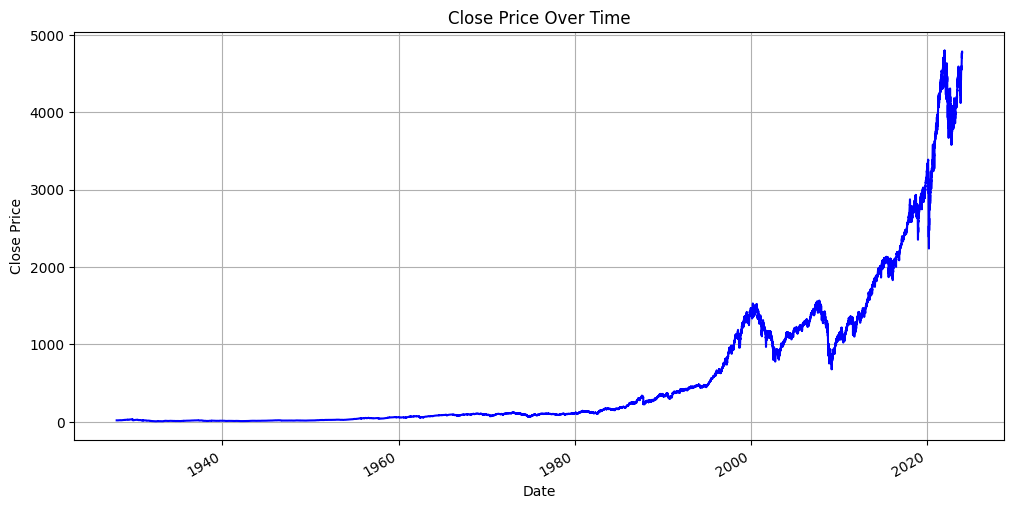

In [5]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
sp500_downloaded['Close'].plot(color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


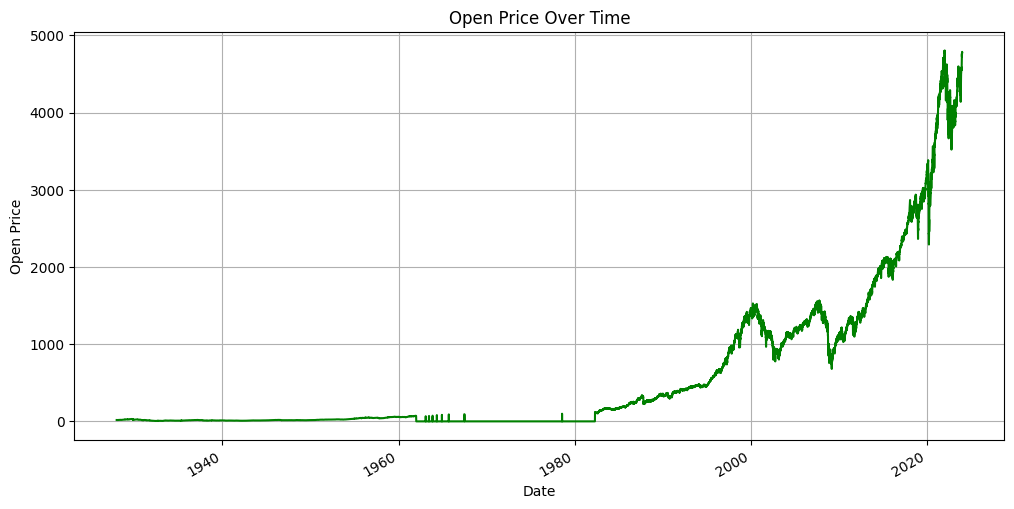

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sp500_downloaded['Open'].plot(color='green')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()


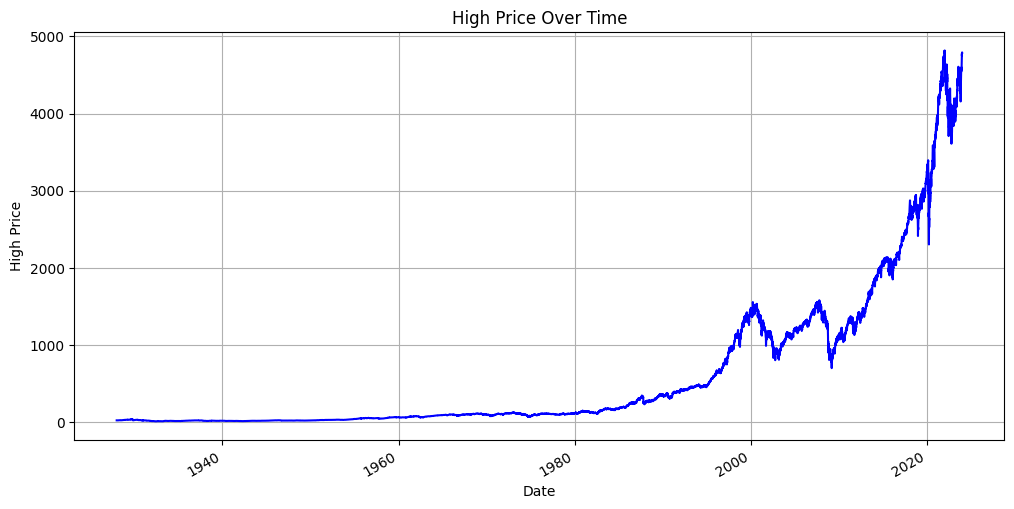

In [7]:

# Plot the data
plt.figure(figsize=(12, 6))
sp500_downloaded['High'].plot(color='blue')
plt.title('High Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.grid(True)
plt.show()


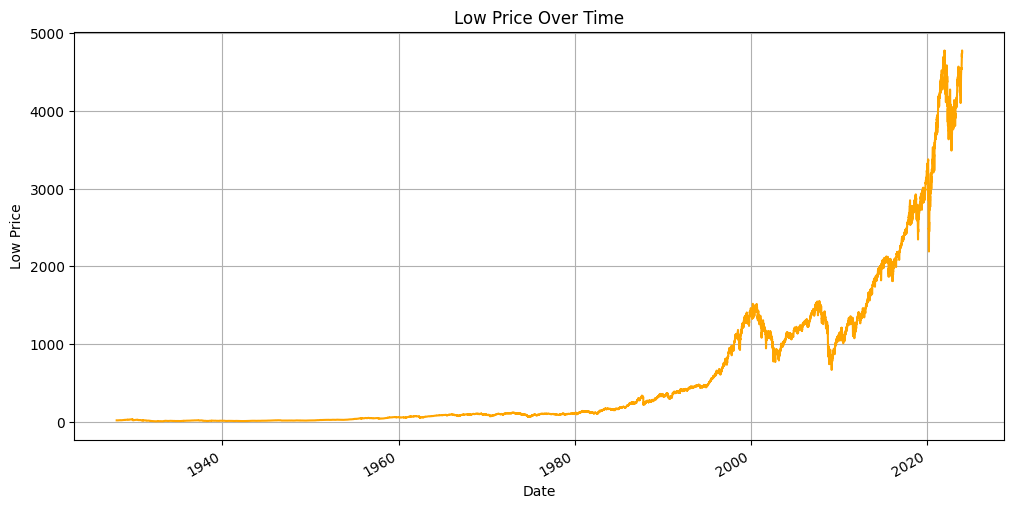

In [9]:

# Plot the data
plt.figure(figsize=(12, 6))
sp500_downloaded['Low'].plot(color='orange')
plt.title('Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()


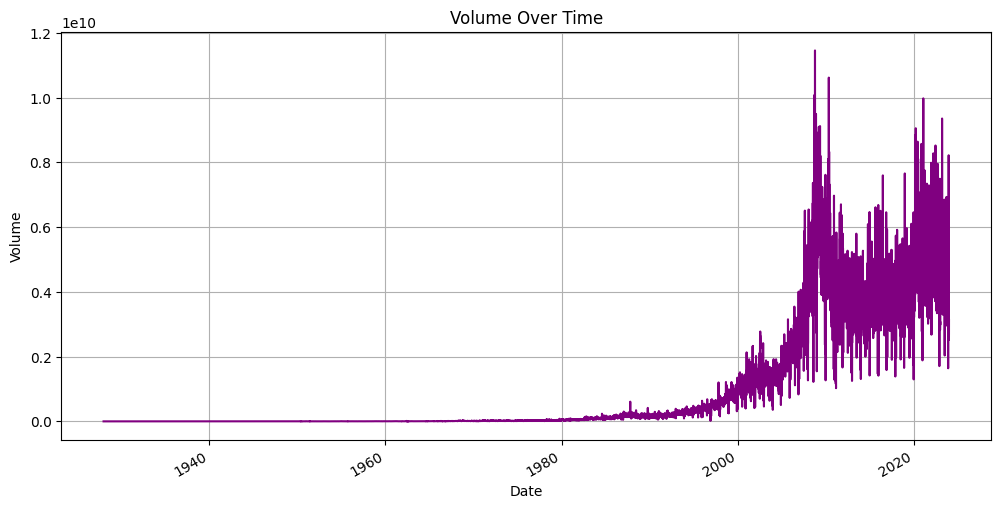

In [10]:

# Plot the data
plt.figure(figsize=(12, 6))
sp500_downloaded['Volume'].plot(color='purple')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


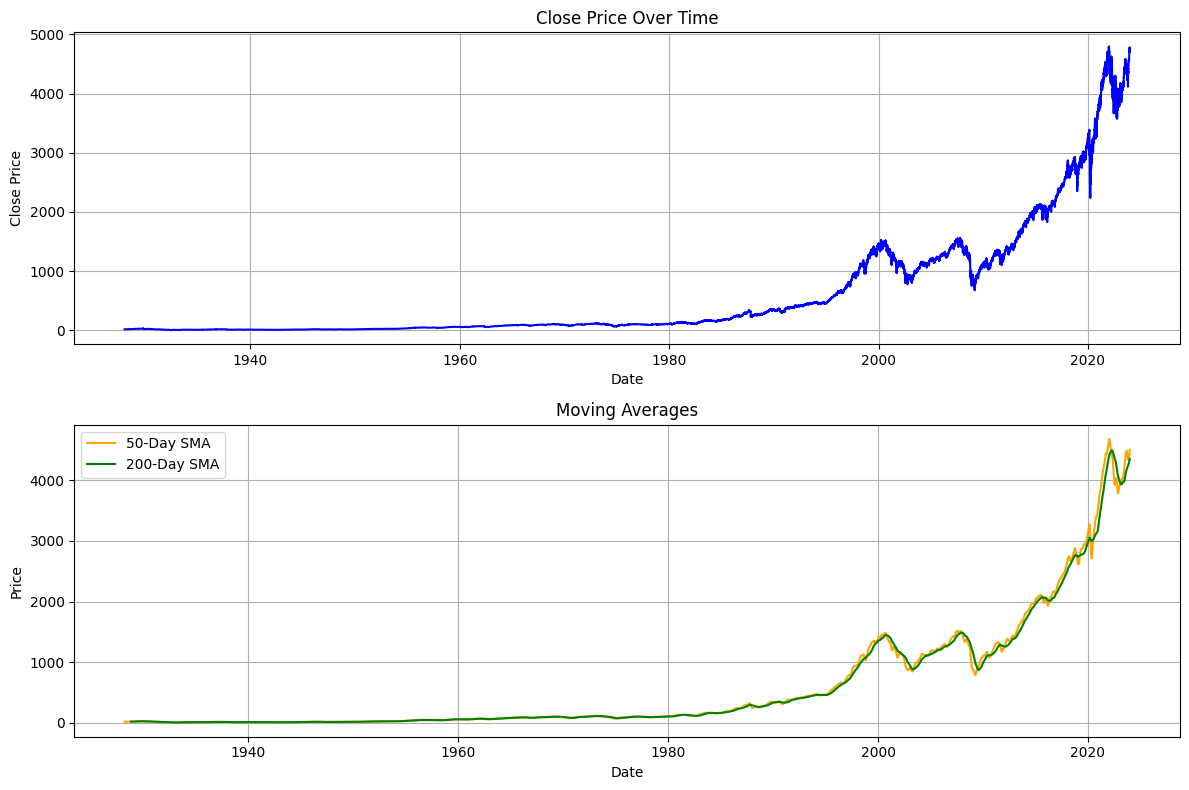

In [11]:
# Moving Averages Plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(sp500_downloaded.index, sp500_downloaded['Close'], color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sp500_downloaded.index, sp500_downloaded['Close'].rolling(window=50).mean(), label='50-Day SMA', color='orange')
plt.plot(sp500_downloaded.index, sp500_downloaded['Close'].rolling(window=200).mean(), label='200-Day SMA', color='green')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


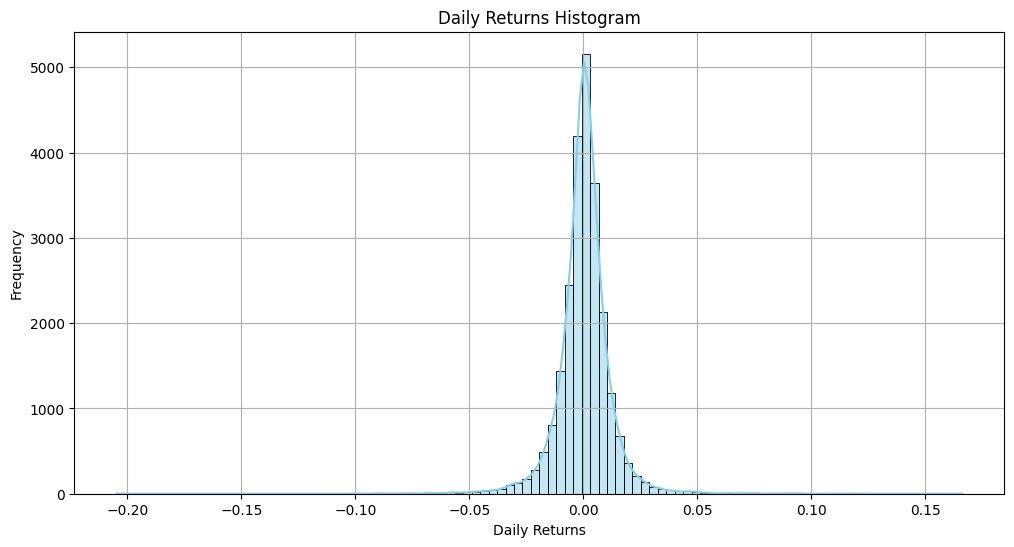

Descriptive Statistics of Daily Returns:
count    24114.000000
mean         0.000304
std          0.011967
min         -0.204669
25%         -0.004565
50%          0.000482
75%          0.005463
max          0.166096
Name: Daily_Return, dtype: float64


In [12]:
import seaborn as sns

# Calculate Daily Returns
sp500_downloaded['Daily_Return'] = sp500_downloaded['Close'].pct_change()

# Plotting Daily Returns Histogram
plt.figure(figsize=(12, 6))
sns.histplot(sp500_downloaded['Daily_Return'].dropna(), bins=100, color='skyblue', kde=True)
plt.title('Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Descriptive Statistics of Daily Returns
print("Descriptive Statistics of Daily Returns:")
print(sp500_downloaded['Daily_Return'].describe())


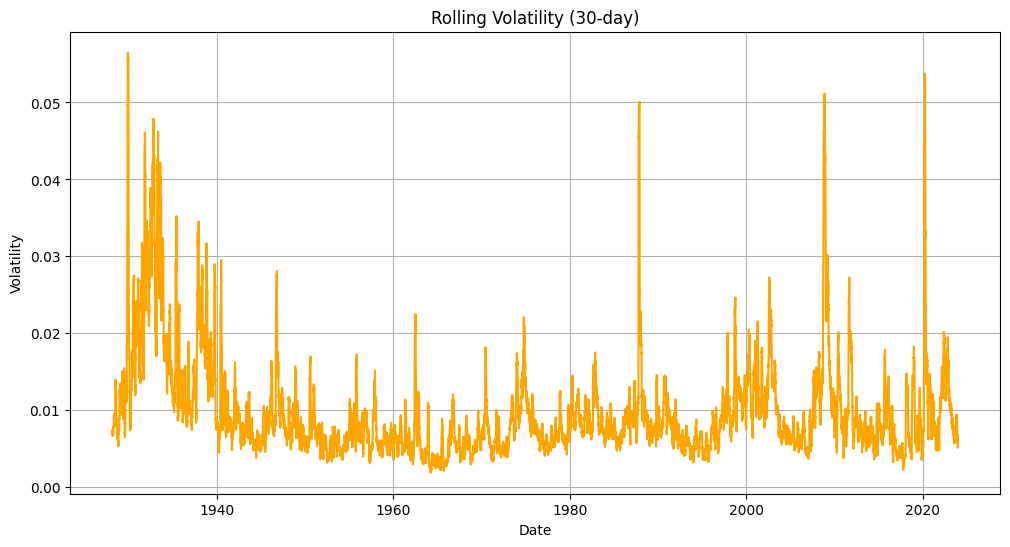

In [13]:
# Define the window for rolling volatility
window = 30

# Calculate Rolling Volatility
sp500_downloaded['Volatility'] = sp500_downloaded['Daily_Return'].rolling(window).std()

# Plotting Volatility
plt.figure(figsize=(12, 6))
plt.plot(sp500_downloaded.index, sp500_downloaded['Volatility'], color='orange')
plt.title('Rolling Volatility (30-day)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


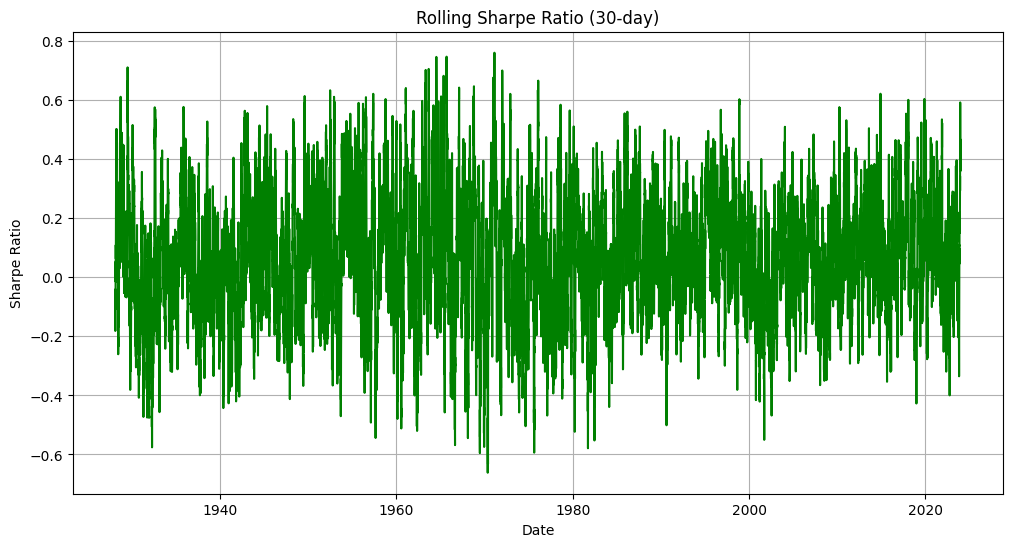

In [14]:
# Define the risk-free rate
risk_free_rate = 0

# Calculate Sharpe Ratio
sp500_downloaded['Sharpe_Ratio'] = (sp500_downloaded['Daily_Return'].rolling(window).mean() - risk_free_rate) / sp500_downloaded['Volatility']

# Plotting Sharpe Ratio
plt.figure(figsize=(12, 6))
plt.plot(sp500_downloaded.index, sp500_downloaded['Sharpe_Ratio'], color='green')
plt.title('Rolling Sharpe Ratio (30-day)')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.show()


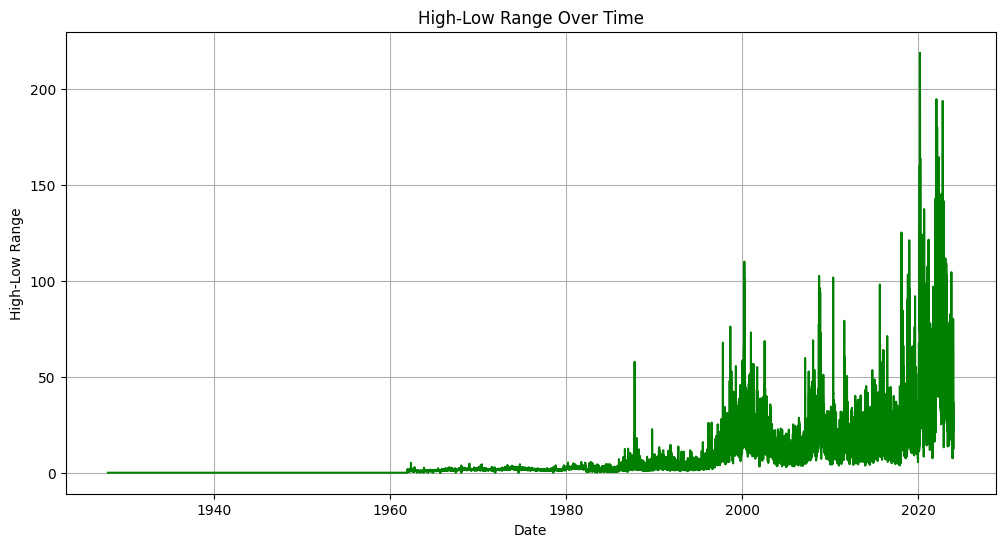

In [15]:
# Plotting High-Low Range Over Time
plt.figure(figsize=(12, 6))
plt.plot(sp500_downloaded.index, sp500_downloaded['High'] - sp500_downloaded['Low'], color='green')
plt.title('High-Low Range Over Time')
plt.xlabel('Date')
plt.ylabel('High-Low Range')
plt.grid(True)
plt.show()
